Import of Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Understanding the data

Understanding the data

In [2]:
df = pd.read_csv("credit_score.csv")

In [3]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df.shape

(100000, 28)

In [5]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


Data Cleaning

In [6]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [7]:
df1 = df.copy()

In [8]:
df1['Annual_Income'].sample(30)

70235            174226.68
32401             118568.6
19918             90371.01
38131             14517.44
43068             19366.73
25804            14185.73_
54706             62574.16
57109           106839.09_
44340             13100.02
88641             24954.36
45387             59923.89
71640             76325.67
74986    52958.43000000001
32353              16653.5
85899            126464.01
99317             81431.96
65158             31722.09
57178            103938.16
68144             48276.66
94626           123947.36_
93638              62630.6
19955            103187.22
25789             45594.72
59740            16691.32_
10658             28193.38
99282             87974.28
47096             38444.52
25120              56301.9
54140             74766.86
14664             58053.27
Name: Annual_Income, dtype: object

In [9]:
# Changing the datatype and replace the values
df1['Annual_Income'] = df1['Annual_Income'].str.replace('_','').astype(float)

In [10]:
df1['Monthly_Inhand_Salary'] = df1['Monthly_Inhand_Salary'].replace(np.nan,0)

In [11]:
df1['Monthly_Inhand_Salary'].isnull().sum()

0

In [12]:
df1['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [13]:
df1['Num_of_Loan'] = df1['Num_of_Loan'].str.replace('_','').astype(int)
df1['Num_of_Loan'].dtype

dtype('int32')

In [14]:
df1['Delay_from_due_date'].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66], dtype=int64)

In [15]:
df1['Delay_from_due_date'] = df1['Delay_from_due_date'].replace('-','')

In [16]:
df1['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [17]:
df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].str.replace('_','')

In [18]:
df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].str.replace('-','')

In [19]:
df1['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8', '6', '1', '3', '0', '5', '9', '12', '15', '17',
       '10', '2', '11', '14', '20', '22', '13', '16', '18', '19', '23',
       '24', '21', '3318', '3083', '1338', '26', '3104', '25', '183',
       '1106', '834', '2672', '2008', '538', '27', '3478', '2420', '707',
       '708', '3815', '28', '1867', '2250', '1463', '4126', '2882',
       '1941', '2655', '2628', '132', '3069', '306', '3539', '3684',
       '1823', '4128', '1946', '827', '2297', '2566', '904', '182', '929',
       '3568', '2503', '1552', '2812', '1697', '3764', '851', '3905',
       '923', '88', '1668', '3253', '808', '2689', '3858', '642', '3457',
       '1402', '1732', '3154', '847', '3037', '2204', '3103', '1063',
       '2056', '1282', '1841', '2569', '211', '793', '3484', '411',
       '3491', '2072', '3050', '1049', '2162', '3402', '2753', '1718',
       '1014', '3260', '3855', '84', '2311', '3251', '1832', '4069',
       '3010', '733', '4241', '166', '2461', '1749', '3200', '663',
       

In [20]:

df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].replace(np.nan,0)

In [21]:
df1['Num_of_Delayed_Payment'].isnull().sum()

0

In [22]:
df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].astype(int)

In [23]:
df1['Num_of_Delayed_Payment'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_of_Delayed_Payment
Non-Null Count   Dtype
--------------   -----
100000 non-null  int32
dtypes: int32(1)
memory usage: 390.8 KB


In [24]:
df1['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [25]:
df1['Credit_Mix'] = df1['Credit_Mix'].str.replace('_','None')

In [26]:
df1['Credit_Mix'].unique()

array(['None', 'Good', 'Standard', 'Bad'], dtype=object)

LabelEncoding

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [28]:
df1['Credit_Mix'] = le.fit_transform(df1['Credit_Mix'])

In [29]:
df1['Credit_Mix'].unique()

array([2, 1, 3, 0])

In [30]:
df1['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [31]:
df1['Outstanding_Debt'] = df1['Outstanding_Debt'].str.replace('_','')
df1['Outstanding_Debt'].isnull().sum()

0

In [32]:
df1['Outstanding_Debt'] = df1['Outstanding_Debt'].astype(float)

In [33]:
df1['Credit_History_Age'].describe

<bound method NDFrame.describe of 0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object>

In [34]:
df1['Credit_History_Age'] = df1['Credit_History_Age'].str.findall(r'(\d+(?:\.\d+)?)')
df1['Credit_History_Age'] = df1['Credit_History_Age'].replace(np.nan,0)
df1['Credit_History_Age'].isnull().sum()

0

In [35]:
df1['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [36]:
df1['Monthly_Balance'].isnull().sum()

1200

In [37]:
df1['Monthly_Balance'] = df1['Monthly_Balance'].str.replace('_','')
df1['Monthly_Balance'] = df1['Monthly_Balance'].replace(np.nan,0)
df1['Monthly_Balance'] = df1['Monthly_Balance'].astype(float)
df1['Monthly_Balance'].isnull().sum()

0

In [38]:
df1['Credit_Score'].isnull().sum()

0

In [39]:
df1['Credit_Score'] = le.fit_transform(df1['Credit_Score'])
df1['Credit_Score'].unique()

array([0, 2, 1])

SELECTION OF USEFUL DATA

In [40]:
x = df1[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Credit_Mix', 'Outstanding_Debt',
        'Monthly_Balance']]
y = df1[['Credit_Score']]

In [41]:
x.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Monthly_Balance
0,19114.12,1824.843333,3,4,3,4,3,7,2,809.98,312.494089
1,19114.12,0.000000,3,4,3,4,-1,0,1,809.98,284.629162
2,19114.12,0.000000,3,4,3,4,3,7,1,809.98,331.209863
3,19114.12,0.000000,3,4,3,4,5,4,1,809.98,223.451310
4,19114.12,1824.843333,3,4,3,4,6,0,1,809.98,341.489231


In [42]:
y.head(5)

,Credit_Score
0,0
1,0
2,0
3,0
4,0


Data Visualizations

<Axes: xlabel='Credit_Score', ylabel='count'>

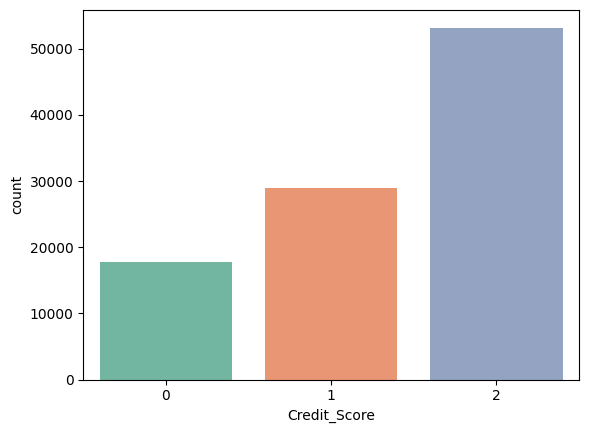

In [43]:
sns.countplot(x="Credit_Score",data=df1,palette= 'Set2')

<Axes: xlabel='Credit_Score', ylabel='Num_of_Delayed_Payment'>

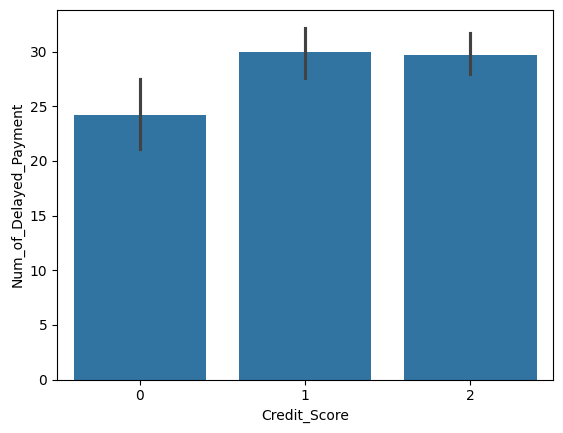

In [44]:
sns.barplot(x="Credit_Score", y=df1["Num_of_Delayed_Payment"].astype(float), data=df1)

In [110]:
from sklearn.model_selection import train_test_split

# X = المتغيرات (features)
# y = المتغير الهدف (Credit Score أو أي اسم عمود عندك)

X = df.drop("Credit_Score", axis=1)   # غير اسم العمود لو مختلف عندك
y = df["Credit_Score"]

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


MODEL Training

In [111]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [112]:
y_pred_lr1 = lr.predict(x_test)
y_pred_lr1

array(['Poor', 'Poor', 'Standard', ..., 'Poor', 'Poor', 'Poor'],
      dtype=object)

In [113]:
from sklearn.metrics import classification_report,r2_score,accuracy_score
accuracy_score(y_pred_lr1,y_test)*100

30.225

In [114]:
cr = classification_report(y_pred_lr1,y_test)
print(cr)

              precision    recall  f1-score   support

        Good       0.00      0.00      0.00         0
        Poor       0.97      0.29      0.45     19418
    Standard       0.03      0.56      0.06       582

    accuracy                           0.30     20000
   macro avg       0.33      0.28      0.17     20000
weighted avg       0.95      0.30      0.44     20000



DecisionTreeClassifier

In [115]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [116]:
y_pred_dt1 = dt.predict(x_test)
cr = classification_report(y_pred_dt1,y_test)
print(cr)

              precision    recall  f1-score   support

        Good       0.60      0.59      0.60      3618
        Poor       0.69      0.69      0.69      5853
    Standard       0.72      0.73      0.72     10529

    accuracy                           0.69     20000
   macro avg       0.67      0.67      0.67     20000
weighted avg       0.69      0.69      0.69     20000



In [117]:
accuracy_score(y_pred_dt1,y_test)*100

69.19

RandomForestClassifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [119]:
y_pred_rfc1 = rfc.predict(x_test)

In [120]:
cr = classification_report(y_pred_rfc1,y_test)
print(cr)

              precision    recall  f1-score   support

        Good       0.69      0.73      0.71      3365
        Poor       0.78      0.78      0.78      5914
    Standard       0.80      0.79      0.79     10721

    accuracy                           0.78     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.78      0.78      0.78     20000



In [121]:
accuracy_score(y_pred_rfc1,y_test)*100

77.51

In [122]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

print(classification_report(y_test, y_pred_rfc1))
print("Precision:", precision_score(y_test, y_pred_rfc1, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rfc1, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rfc1, average='weighted'))


              precision    recall  f1-score   support

        Good       0.73      0.69      0.71      3527
        Poor       0.78      0.78      0.78      5874
    Standard       0.79      0.80      0.79     10599

    accuracy                           0.78     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.77      0.78      0.77     20000

Precision: 0.7746127112171258
Recall: 0.7751
F1 Score: 0.7747708351743485


In [123]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_pred_bin = label_binarize(y_pred_rfc1, classes=[0,1,2])

roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='weighted')
print("ROC-AUC:", roc_auc)


ROC-AUC: 0


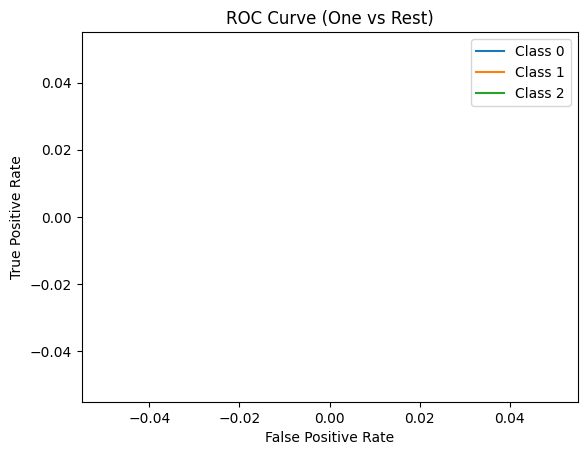

In [124]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr = {}
tpr = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])

plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f"Class {i}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One vs Rest)")
plt.legend()
plt.show()
